In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st

%matplotlib inline

In [29]:
data = pd.read_csv('credit_card_default_analysis.csv')
data.head(10)

,ID,LIMIT_BAL,GENDER,EDUCATION,MARITAL,AGE,PAY_SEP,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_JUN,BILL_MAY,BILL_APR,PAY_SEP.1,PAY_AUG.1,PAY_JUL.1,PAY_JUN.1,PAY_MAY.1,PAY_APR.1,default
0,1,20000,2,2,1,24,2,2,0,0,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,0,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,0,0,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
5,6,50000,1,1,2,37,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
6,7,500000,1,1,2,29,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
7,8,100000,2,2,2,23,0,0,0,0,...,221,-159,567,380,601,0,581,1687,1542,0
8,9,140000,2,3,1,28,0,0,2,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0
9,10,20000,1,3,2,35,0,0,0,0,...,0,13007,13912,0,0,0,13007,1122,0,0


## 1. Credit limit 
Test whether there are differences between median credit limits of two groups.

Let us look at two samples:
 * Defaulted people (binary indicator == 1)
 * Not defaulted people (binary indicator == 0)

In [30]:
data.groupby('default')['LIMIT_BAL'].median()

default
0    150000
1     90000
Name: LIMIT_BAL, dtype: int64

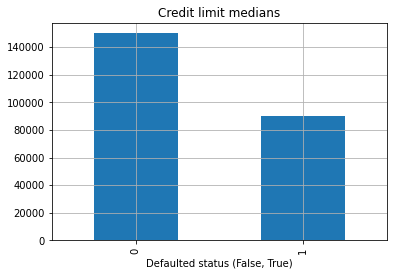

In [31]:
data.groupby('default')['LIMIT_BAL'].median().plot.bar()
plt.title('Credit limit medians')
plt.xlabel('Defaulted status (False, True)')
plt.grid()
plt.show()

* Null Hypothesis (H0) - medians of the samples are the same
* Alternative Hypothesis (H1) - medians in samples are different

Let use Mood's median test.

The Mood’s median test is a nonparametric test that is used to test the equality of medians from two or more populations. Therefore, it provides a nonparametric alternative to the one-way ANOVA. The Mood’s median test works when the Y variable is continuous, discrete-ordinal or discrete-count, and the X variable is discrete with two or more attributes.


In [32]:
median = data.LIMIT_BAL.median()

len_x = len(data.LIMIT_BAL[data.default == 1]) / 2
len_y = len(data.LIMIT_BAL[data.default == 0]) / 2

not_default_high = sum(
    median < data.LIMIT_BAL[data.default == 0] 
)
default_high = sum(
    median < data.LIMIT_BAL[data.default == 1]
)
not_default_low = sum(
    median >= data.LIMIT_BAL[data.default == 0]
)
default_low = sum(
    median >= data.LIMIT_BAL[data.default == 1]
)

stat = ((len_x - default_low)**2 / len_x) + \
    ((len_x - default_high)**2 / len_x) + \
    ((len_y - not_default_low)**2 / len_y) + \
    ((len_y - not_default_high)**2 / len_y)

stat

694.8834716738601

The test statistic has a chi-square distribution

In [33]:
p_value = 1 - st.chi2.cdf(stat, 1)
p_value

0.0

The p-value is the likelihood of the observed data, given that the null hypothesis is true. P-value is 0.0, so we can't take H0 and should choose H1

## 2. Gender 
Test whether gender composition of two groups differ.

* Null Hypothesis (H0) - The ratio of the number of men and women in samples of defaulted and opposite (payments are being made) customers is the same.
* Alternative Hypothesis (H1) - The ratio of the number of men and women in samples of defaulted and opposite (payments are being made) customers are different.

Let use Two-sample independent z-test.

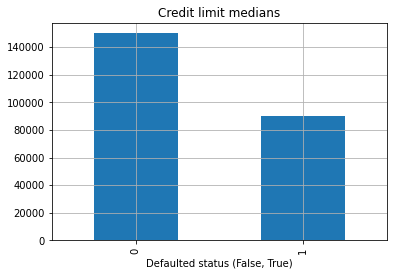

In [34]:
data.groupby('default')['LIMIT_BAL'].median().plot.bar()
plt.title('Credit limit medians')
plt.xlabel('Defaulted status (False, True)')
plt.grid()
plt.show()

In [35]:
x = data.GENDER[data.default == 1] - 1
y = data.GENDER[data.default == 0] - 1

x_head = np.mean(x)
y_head = np.mean(y)

z_stat = (x_head - y_head) / (x_head * (1 - x_head) / len(x) + y_head * (1 - y_head) / len(y))**0.5
z_stat

-6.858927391448388

Define P-values that Null hypothise is right

In [36]:
p_value = 2 * st.norm.cdf(z_stat)
p_value

6.9379488648039966e-12

In [37]:
print(p_value < 0.01)
print(p_value < 0.001)

True
True


Define the level of significance (alpha) = 0.01
Remined, that the p-value is the likelihood of the observed data, given that the null hypothesis is true.
P-value < alpha (P-value is close to 0 (too small))
So we can't choose H0 and should choose H1

## 3. Education 
Test whether education levels differs between two groups. If it does, then how exactly?

* Null Hypothesis (H0) - Distribution of educational levels in samples of defaulted and not defaulted (payments are being made) customers is the same.
* Alternative Hypothesis (H1) - Distribution of educational levels in samples of defaulted and not defaulted (payments are being made) customers are different.

Let use Mann-Whitney test and two-sample independent z-test.

Mann–Whitney U test is a nonparametric test of the null hypothesis that, for randomly selected values X and Y from two populations, the probability of X being greater than Y is equal to the probability of Y being greater than X.

In [38]:
x = data.EDUCATION[data.default == 1]
x = x[x != 6]
x_head = np.mean(x)
len_x = len(x)

y = data.EDUCATION[data.default == 0]
y = y[y != 6]
y_head = np.mean(y)
len_y = len(y)

mw_twet = st.mannwhitneyu(x, y)
mw_twet

MannwhitneyuResult(statistic=72827074.0, pvalue=3.2824770271103715e-15)

In [39]:
p_value = mw_twet[1]
print(p_value < 0.01)
print(p_value < 0.001)

True
True


Mann-Whitney test rejects the null hypothesis - the distribution of educational attainment among bankrupts and non-bankrupts

Let create the 95% confidence interval for the difference in the mean level of education between defaulted and not defaulted (payments are being made) customers.

In [40]:
sqr = ((len_x * np.var(x) + len_y * np.var(y)) / (len_x + len_y - 1))**0.5

conf_low = x_head - y_head + st.norm.ppf(0.025) * sqr
conf_high = x_head - y_head - st.norm.ppf(0.025) * sqr
conf_low, conf_high

(-1.4568668055998226, 1.5689489949863997)

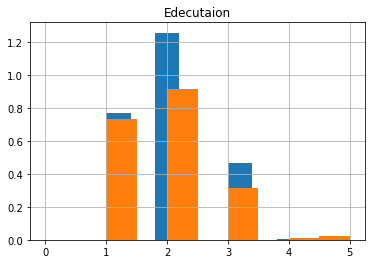

In [41]:
plt.title('Edecutaion')
plt.hist(x, density = True)
plt.hist(y, density = True)
plt.grid()
plt.show()

Define the level of significance (alpha) = 0.01

And find P-value by Mann–Whitney U test is smaller that alpha

P-value < alpha (P-value is close to 0 (too small))

Mann-Whitney test rejects the null hypothesis - the distribution of educational attainment among bankrupts and non-bankrupts

We can see differences in distributions, hovewer the mean value of the categorical variable Education in the two groups is very close

## 4. Marital status 
Проверьте, как связан семейный статус с индикатором дефолта: нужно предложить меру, по которой можно измерить возможную связь этих переменных и посчитать ее значение.

* Null Hypothesis (H0) - population proportions of married in samples of defaulted and not defaulted (payments are being made) customers is the same.
* Alternative Hypothesis (H1) - Distribution of educational levels in samples of defaulted and not defaulted (payments are being made) customers are different.

Let use two-sample independent z-test.

In [42]:
x = data.MARITAL[data.default == 1]
x = x[((x == 1)|(x == 2))] - 1
x_head = np.mean(x)

y = data.MARITAL[data.default == 0]
y = y[((y == 1)|(y == 2))] - 1
y_head = np.mean(y)

In [43]:
# Define Z Stat
sqr = ((x_head * (1 - x_head) / len(x)) + y_head * ((1 - y_head) / len(y)))**0.5
z_stat = (x_head - y_head) / sqr
z_stat

-5.249044038246137

In [44]:
# Define P-value
p_value = 2 * st.norm.cdf(z_stat)
p_value

1.5289052634992484e-07

In [45]:
print(p_value < 0.01)
print(p_value < 0.001)

True
True


P-value < alpha (P-value is close to 0 (too small))

So we can't choose H0 and should choose H1
Let us check the condition

Let us find the difference in the proportion of married people in the two samples:

In [46]:
dif = (1 - x_head) - (1 - y_head)
dif

0.03670848172962615

In [47]:
print((1 - x_head) > (1 - y_head))

True


Define the level of significance (alpha) = 0.01

Remined, that the p-value is the likelihood of the observed data, given that the null hypothesis is true.

P-value < alpha (P-value is close to 0 (too small))

So we can't choose H0 and should choose H1

We also can see that amount of defaulted people is bigger in the married sample.

## 5. Age

Test whether there are differences between mean ages of clients in two groups.

* Null Hypothesis (H0) - Mean age in samples of defaulted and not defaulted (payments are being made) clients is the same.
* Alternative Hypothesis (H1) - Mean age in samples of defaulted and not defaulted (payments are being made) clients are different.

Let use two-sample independent T-test.

In [48]:
x = data.AGE[data.default == 1]
x_head = np.mean(x)
len_x = len(x)

y = data.AGE[data.default == 1]
y_head = np.mean(y)
len_y = len(y)

In [49]:
# Calculate t-stat
sqr = ((len_x * np.var(x) + len_y * np.var(y)) / (len_x + len_y - 1))**0.5
t_stat = (x_head - y_head)/sqr
t_stat

0.0

In [50]:
p_value = 2 * (1 - st.t.cdf(t_stat, (len_x + len_y - 1)))
p_value

1.0

P-value is 1.0, it means that mean age in samples of defaulted and not defaulted (payments are being made) clients is the same.

In [51]:
p_value < 0.05, p_value < 0.01, p_value < 0.001

(False, False, False)

Define the level of significance (alpha) = 0.01

Remined, that the p-value is the likelihood of the observed data, given that the null hypothesis is true.

P-value >= alpha (P-value is 1.0) 

It means that mean age in samples of defaulted and not defaulted (payments are being made) clients is the same.